In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime

import calendar

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data Pre-processing

In [2]:
df_orig=pd.read_excel("master_file_final.xlsx")
df_orig.shape


(57764, 88)

In [5]:
#df_orig.to_excel("master_file_final.xlsx")


In [3]:
df = df_orig[(df_orig['TxStartDt'].dt.year <= 2021)&(df_orig['CreatedDate'].dt.year>=2010)]
df = df_orig[(df_orig['Category_x']!='Planned Delay 3')&(df_orig['Category_x']!='planned Delay 3')]

df.shape


(46442, 88)

In [4]:
df['Category_x'].value_counts()

Standard 3     34247
Urgent 2       10358
Emergency 1     1819
Name: Category_x, dtype: int64

In [5]:
df['SiteGroup'].unique()

array(['LUNG', 'GENITOURINARY(GU)', 'GI LOWER', 'BREAST', 'GI UPPER',
       'GYNAE', 'Oligomets', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS',
       'SARCOMA', 'SKIN', 'EYE', 'ENDOCRINE', 'Unknown', 'PAEDIATRIC',
       'PAIN', nan], dtype=object)

In [ ]:
#df_2020 = df[(df['CreatedDate']>='2019-12-02')&(df[df['CreatedDate']<'2020-03-01'])]



In [70]:
df_1820 = pd.read_excel('ins_2018_2020_part2_QuantileRules.xlsx')


In [71]:
df_1820['WaitTime(weekday)'].mean()

8.952723883758367

In [72]:
df_1820[(df_1820['Category_x']=='Urgent 2')&(df_1820['Intent1']!='Palliative')]['WaitTime(weekday)'].mean()


5.629126213592233

In [73]:
df_1820[(df_1820['Category_x']=='Standard 3')&(df_1820['Intent1']=='Complex Palliation')]['WaitTime(weekday)'].mean()


10.24594363791631

In [74]:
df_1820[(df_1820['Category_x']=='Standard 3')&(df_1820['Intent1']=='Radical')]['WaitTime(weekday)'].mean()

12.88988143576417

In [75]:
df_1820[(df_1820['Category_x']=='Standard 3')]['WaitTime(weekday)'].mean()

10.934355214928358

In [76]:
df_1820[(df_1820['Intent1']=='Radical')]['WaitTime(weekday)'].mean()

12.688060405851816

In [77]:
df_1820[(df_1820['Intent1']=='Complex Palliation')]['WaitTime(weekday)'].mean()

9.153432032301481

# Wait time analysis

## Mean and S.D.

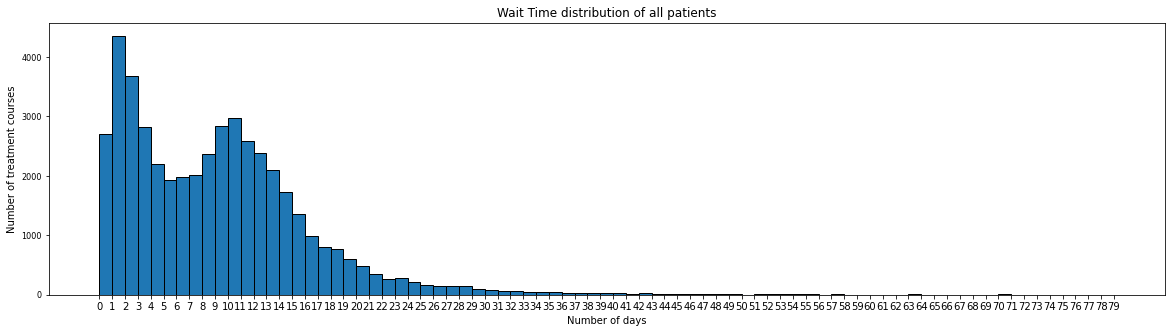

In [6]:
bins = range(0,80,1)

plt.figure(figsize=(20,5)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(daDF['WaitTime'],bins=bins, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

plt.hist(df['WaitTime(weekday)'], bins = bins, edgecolor='black')
plt.xlabel('Number of days')
plt.ylabel('Number of treatment courses')
plt.title('Wait Time distribution of all patients')
plt.xticks(np.arange(0, 80, 1), fontsize=10)
plt.yticks(fontsize=8)

plt.show()

In [7]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

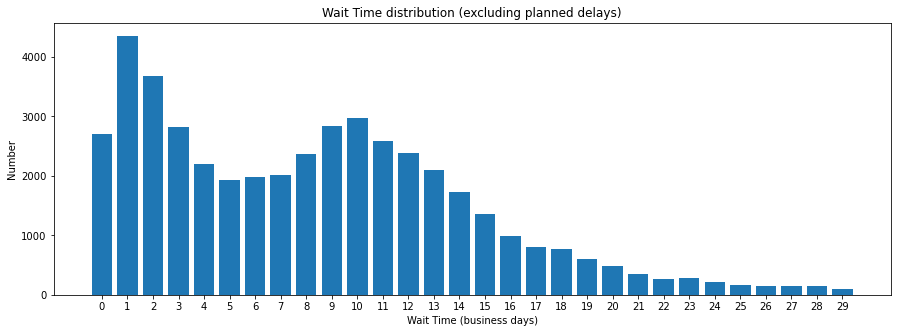

In [10]:
x = range(0,30)
y=[]
for i in x:
    wt = len(df[df['WaitTime(weekday)']==i])
    y.append(wt)

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.xticks(np.arange(0, 30))
plt.xlabel("Wait Time (business days)")
plt.ylabel("Number")
plt.title('Wait Time distribution (excluding planned delays)');

<AxesSubplot:xlabel='WaitTime(weekday)'>

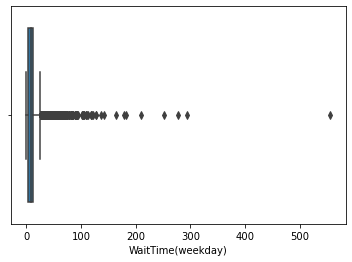

In [14]:
# outliers
import seaborn as sns
sns.boxplot(x=df['WaitTime(weekday)'])

In [15]:
df['WaitTime(weekday)'].quantile(0.90)

17.0

In [16]:
len(df[df['WaitTime(weekday)']<=20])

43792

In [23]:
# yearly average wait time
avg_WT = []
std_WT = []
med_WT = []
for i in range(2010,2021):
    df_yearly=df[df['CreatedDate'].dt.year == i]
    avg = df_yearly['WaitTime(weekday)'].mean()
    std = df_yearly['WaitTime(weekday)'].std()
    median = df_yearly['WaitTime(weekday)'].median()
    avg_WT.append(avg)
    std_WT.append(std)
    med_WT.append(median)
    

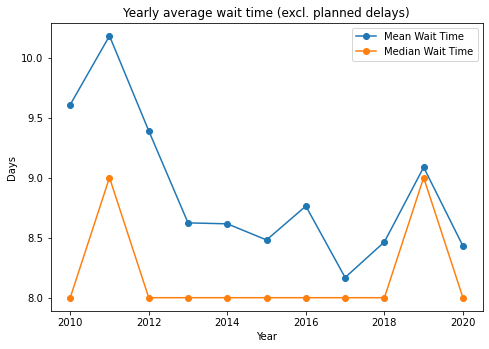

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = range(2010,2021)
plt.plot(years, avg_WT, '-o', label='Mean Wait Time')
plt.plot(years, med_WT,'-o', label = 'Median Wait Time')
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Days")
plt.title('Yearly average wait time (excl. planned delays)')
plt.show()


In [28]:
std_WT
import statistics
statistics.mean(std_WT)

8.673811076017332

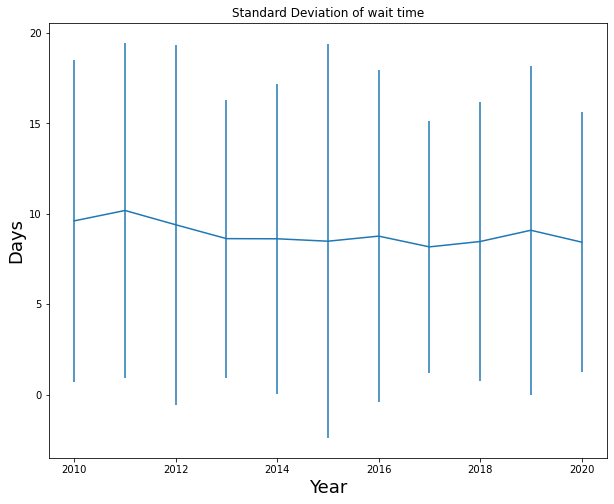

In [29]:
# Create a figure with customized size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('Days', fontsize = 18)
ax.set_title("Standard Deviation of wait time")

# X axis is day numbers from 1 to 15
xaxis = np.array(range(2010,2021))
# Create an error bar for each dataset
line=ax.errorbar(xaxis, avg_WT, yerr=std_WT)

In [30]:
df['SiteGroup'].unique()

array(['LUNG', 'GENITOURINARY(GU)', 'GI LOWER', 'BREAST', 'GI UPPER',
       'GYNAE', 'Oligomets', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS',
       'SARCOMA', 'SKIN', 'EYE', 'ENDOCRINE', 'Unknown', 'PAEDIATRIC',
       'PAIN', nan], dtype=object)

In [31]:
# Correct spelling in site groups:
df['SiteGroup'].replace(to_replace={'breast': 'Breast',
                                 'lung': 'Lung',
                                 'gynae': 'Gynae',
                                 'GYNae'  : 'Gynae',
                                 'cns': 'CNS',
                                 'cNS':'CNS',
                                 'head & Neck' : 'Head & Neck',
                                 'head & Neck' : 'Head & Neck',
                                 'lymphoma':'Lymphoma',
                                 'skin':'Skin',
                                 'eye' : 'Eye'}, inplace=True )

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
# Correcting Standard 2 = Standard 3
df = df.replace({'Category_x': {'Standard 2': 'Standard 3', 
                                'Urgent ICU/SDU 2':'Urgent 2'}})
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

In [33]:
df['SiteGroup'].value_counts()

BREAST               8186
LUNG                 7709
GENITOURINARY(GU)    5306
ENT (HEAD & NECK)    4896
CNS                  4042
LYMPHOMA             3486
GI UPPER             2933
GYNAE                2675
SARCOMA              2312
GI LOWER             1940
PAEDIATRIC            985
ENDOCRINE             727
EYE                   618
SKIN                  587
Oligomets              35
Unknown                 2
PAIN                    1
Name: SiteGroup, dtype: int64

In [34]:
df[df['CreatedDate'].dt.year == 2017]['SiteGroup'].value_counts()

BREAST               821
LUNG                 694
GENITOURINARY(GU)    494
CNS                  385
ENT (HEAD & NECK)    347
LYMPHOMA             270
GI UPPER             267
SARCOMA              243
GYNAE                233
GI LOWER             162
PAEDIATRIC            75
EYE                   65
ENDOCRINE             63
SKIN                  57
Name: SiteGroup, dtype: int64

In [41]:
# Categorise [Paediatrics, Endocrine, Eye, Skin, Oligomets, Unknown, PAIN ] to one minority group
df['SiteGroup'].replace(to_replace={'Paediatrics': 'Minority',
                                     'Endocrine': 'Minority',
                                     'Skin': 'Minority',
                                     'Eye'  : 'Minority',
                                     'Oligomets':'Minority',
                                     'Unknown': 'Minority',
                                     'PAIN':'Minority'
                                   }, inplace=True )

In [50]:
df_exceed=df[df['WaitTime(weekday)']>10]
df_exceed.shape


(16486, 88)

In [51]:
df_meet = df[df['WaitTime(weekday)']<=10]
df_meet.shape


(29956, 88)

## Yearly percentage of exceeding 14-day target

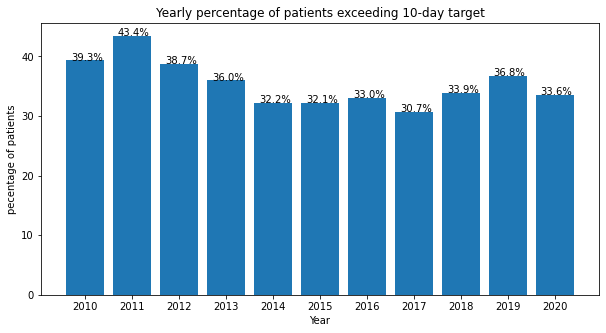

In [39]:
percentage_exceed={}
for i in range(2010, 2021):
    num_exceed = len(df_exceed[df_exceed['CreatedDate'].dt.year == i])
    num = len(df[df['CreatedDate'].dt.year == i])
    percentage_exceed[i] = num_exceed/num * 100
percentage_exceed

plt.figure(figsize=(10,5))
plt.bar(range(len(percentage_exceed)), percentage_exceed.values(), align='center')
plt.xticks(range(len(percentage_exceed)), list(percentage_exceed.keys()))
plt.xlabel("Year")
plt.ylabel("pecentage of patients")

for index,data in enumerate(percentage_exceed.values()):
    plt.text(x=index-0.3, y=data, s=f"{data:.1f}%" , fontdict=dict(fontsize=10))
plt.title("Yearly percentage of patients exceeding 10-day target")
plt.show()


## Who are those delayed patients?


Text(0.5, 1.0, 'Percentage of patients exceeding 10-day target by SiteGroup')

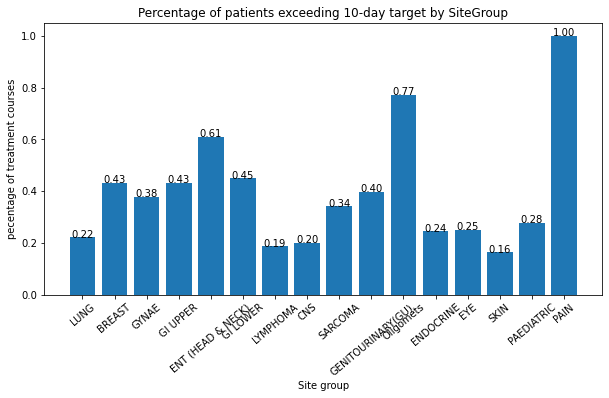

In [40]:
late_percentage_site = {}
SiteGroups=df_exceed['SiteGroup'].unique()

for i in SiteGroups:
    percent = df_exceed['SiteGroup'].value_counts()[i]/df['SiteGroup'].value_counts()[i]
    late_percentage_site[i] = percent

keys = late_percentage_site.keys()
values = late_percentage_site.values()

plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.xlabel("Site group")
plt.ylabel("pecentage of treatment courses")

for index,data in enumerate(values):
    plt.text(x=index-0.35, y=data, s=f"{data:.2f}" , fontdict=dict(fontsize=10))
    
plt.xticks(range(len(SiteGroups)), late_percentage_site.keys(), rotation=40)
plt.title('Percentage of patients exceeding 10-day target by SiteGroup')

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


LUNG
BREAST
GYNAE
GI UPPER
H&N
GI LOWER
LYMPHOMA
CNS
SARCOMA
GU
ENDOCRINE
EYE
SKIN
PAEDIATRIC


Text(0.5, 1.0, 'Percentage of patients exceeding 10-day target by site groups')

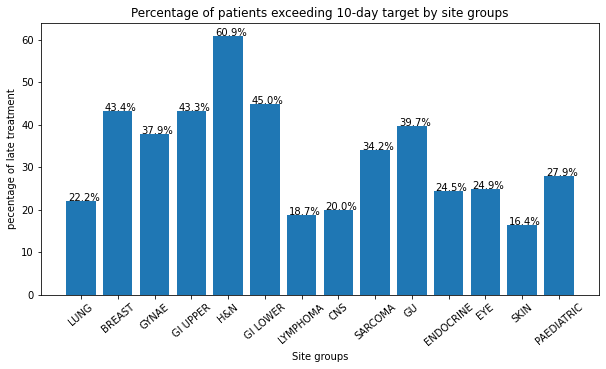

In [82]:
late_percentage_site = {}

df_ex_sg = df_exceed
df_ex_sg.replace({'SiteGroup': {'ENT (HEAD & NECK)': 'H&N', 'GENITOURINARY(GU)': 'GU'}}, inplace=True)
df_sg = df
df_sg.replace({'SiteGroup': {'ENT (HEAD & NECK)': 'H&N', 'GENITOURINARY(GU)': 'GU'}}, inplace=True)

list_sitegroup = df_ex_sg['SiteGroup'].unique().tolist()
list_sitegroup.remove('PAIN')
list_sitegroup.remove('Oligomets')

for i in list_sitegroup:
    print(i)
    percent = df_ex_sg['SiteGroup'].value_counts()[i]/df_sg['SiteGroup'].value_counts()[i]
    late_percentage_site[i] = percent * 100

keys = late_percentage_site.keys()
values = late_percentage_site.values()

plt.figure(figsize=(10,5))
plt.bar(keys, values)
plt.xlabel("Site groups")
plt.ylabel("pecentage of late treatment")

for index,data in enumerate(values):
    plt.text(x=index-0.35, y=data, s=f"{data:.1f}%" , fontdict=dict(fontsize=10))
    
plt.xticks(range(len(list_sitegroup)), late_percentage_site.keys(), rotation=40)
plt.title('Percentage of patients exceeding 10-day target by site groups')

In [284]:
df_exceed['Intent1'].unique()

array(['Radical', 'Complex Palliation', 'Palliative', nan], dtype=object)

In [285]:
df['Intent1'].unique()

array(['Palliative', 'Radical', 'Complex Palliation',
       'PalliatiComplex Palliationve', nan], dtype=object)

Radical
Complex Palliation
Palliative


Text(0.5, 1.0, 'Percentage of patients exceeding 10-day target by treatment intents')

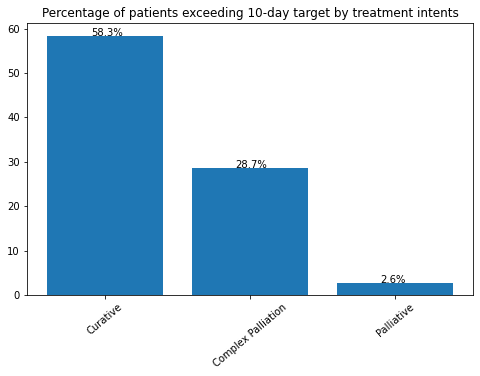

In [44]:
Intents=df_exceed['Intent1'].unique()
Intents = [x for x in Intents if pd.isnull(x) == False]

late_percentage_category = {}

for i in Intents:
    print(i)
    percent = df_exceed['Intent1'].value_counts()[i]/df['Intent1'].value_counts()[i]
    late_percentage_category[i] = percent*100

keys = late_percentage_category.keys()
values = late_percentage_category.values()

plt.figure(figsize=(8,5))
plt.bar(keys, values)

for index,data in enumerate(values):
    plt.text(x=index-0.1, y=data, s=f"{data:.1f}%" , fontdict=dict(fontsize=10))
    
plt.xticks(range(len(Intents)), ['Curative','Complex Palliation','Palliative'], rotation=40) #late_percentage_category.keys()
plt.title('Percentage of patients exceeding 10-day target by treatment intents')


In [45]:
df_exceed['Category_x'].value_counts()

Standard 3     16120
Urgent 2         342
Emergency 1       15
Name: Category_x, dtype: int64

In [46]:
df['Category_x'].value_counts()

Standard 3     34247
Urgent 2       10358
Emergency 1     1819
Name: Category_x, dtype: int64

In [47]:
Categories=df_exceed['Category_x'].unique()
Categories = [x for x in Categories if pd.isnull(x) == False]
Categories

['Standard 3', 'Urgent 2', 'Emergency 1']

Standard 3
Urgent 2
Emergency 1


Text(0.5, 1.0, 'Percentage of patients exceeding 14-day target by patient categories')

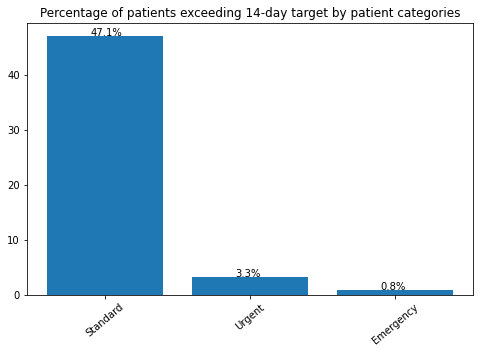

In [48]:
late_percentage_category = {}

for i in Categories:
    print(i)
    percent = df_exceed['Category_x'].value_counts()[i]/df['Category_x'].value_counts()[i]
    late_percentage_category[i] = percent*100

keys = late_percentage_category.keys()
values = late_percentage_category.values()

plt.figure(figsize=(8,5))
plt.bar(keys, values)

for index,data in enumerate(values):
    plt.text(x=index-0.1, y=data, s=f"{data:.1f}%" , fontdict=dict(fontsize=10))
    
plt.xticks(range(len(Categories)), ['Standard','Urgent','Emergency'], rotation=40)
plt.title('Percentage of patients exceeding 14-day target by patient categories')


In [53]:
df[df['Category_x']=='Urgent 2']['WaitTime(weekday)'].mean()

2.797547789148484

In [54]:
df[df['Category_x']=='Emergency 1']['WaitTime(weekday)'].mean()

0.5684442001099506

In [55]:
df[df['Category_x']=='Standard 3']['WaitTime(weekday)'].mean()

11.210967384004439

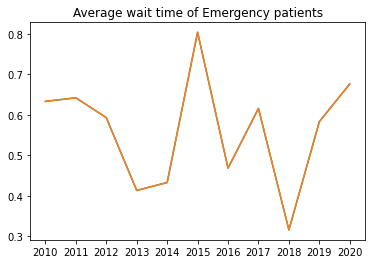

In [56]:
list_emergency_waitTime = []
for y in range(2010,2021):
    df_y=df[df['CreatedDate'].dt.year==y]
    avg = df_y[df_y['Category_x']=='Emergency 1']['WaitTime(weekday)'].mean()
    list_emergency_waitTime.append(avg)

x = range(0,11)
y = list_emergency_waitTime
plt.plot(x, y)
plt.xticks(np.arange(0, 11), labels=range(2010,2021))
plt.title('Average wait time of Emergency patients')
plt.plot(y);

In [ ]:
df_2015 = df[df['CreatedDate'].dt.year==2015]
df_2015[(df_2015['Category_x']=='Emergency 1')&(df_2015['WaitTime']>1)][['MRN','CreatedDate','StartDate','TotalWaitTime']]

In [ ]:
df[df['Category_x']=='Standard 3']['WaitTime'].mean()

In [ ]:
df_exceed['Intent'].value_counts()

## Which step is taking so long?

In [57]:
#df = pd.read_excel('master_processed_1.xlsx')
df = df[df['Category_x']!='Planned Delay 3']
df.columns

Index(['MRN', 'CreatedDate', 'CreatedTime', 'ActivatedDate', 'ActivatedTime',
       'SiteGroup', 'Diagnosis', 'Category_x', 'PlanCreateDate',
       'PlanCreateTime', 'StartDate', 'ConcurrentTx', 'Intent1', 'Intent2',
       'Team', 'GTV/CTVPromtDate', 'GTV/CTVPromtTime', 'GTV/CTVCompleteDate',
       'GTV/CTVCompleteTime', 'ReviewDatePlaner', 'Review-ContourCompl',
       'Review-PlanCompl', 'ReviewTimePlaner', 'Location_x', 'SimApptDate',
       'SimApptTime', 'FinalPlanPromtDate', 'FinalPlanPromtTime',
       'FinalPlanCompleteDate', 'FinalPlanCompleteTime',
       'PlanReviewRequestDate', 'PlanReviewRequestTime',
       'PlanProgressReviewDate', 'ProgressRev-ContourCompl',
       'ProgressReview-PlanCompl', 'PlanProgressReviewTime',
       'eBookingReviDate', 'eBookingReviTime', 'COVID19', 'eBookingStatus',
       'Unnamed: 37', 'ApptDtTm', 'SimApptDt', 'SimApptTm', 'SimApptDuration',
       'SimApptCreatedDt', 'SimLocation', 'CTDtDiff', 'CTWait', 'MinDiff',
       'TxStartDt', 'T

In [59]:
df_ex_2019=df_exceed[df_exceed['CreatedDate'].dt.year==2019]
df_reason = df_ex_2019[['Category_x','CTWait','ContourDur','TimeBtw_Sim_ContourCompl','TimeBtw_Sim_BkTx','PlanDur',
                        'PlanDur',
                      'TimeBtw_ContourCompl_PlanReview','Tx-TxBook','Tx-PlanCompl','Tx-PlanReview',
                      'TimeBtw_BkTx_PlanReview',
                      'TotalWaitTime']]

In [60]:
df_reason

,Category_x,CTWait,ContourDur,TimeBtw_Sim_ContourCompl,TimeBtw_Sim_BkTx,PlanDur,PlanDur,TimeBtw_ContourCompl_PlanReview,Tx-TxBook,Tx-PlanCompl,Tx-PlanReview,TimeBtw_BkTx_PlanReview,TotalWaitTime
11,Standard 3,13,0.0,1.0,7,0.0,0.0,5.0,6,6.0,7.0,-1.0,26
93,Standard 3,7,4.0,7.0,7,0.0,0.0,NaN,6,1.0,NaN,NaN,20
101,Standard 3,17,3.0,3.0,3,3.0,3.0,2.0,8,2.0,6.0,2.0,28
106,Standard 3,7,1.0,1.0,14,1.0,1.0,NaN,8,1.0,NaN,NaN,29
111,Standard 3,6,1.0,1.0,6,NaN,NaN,NaN,3,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57659,Standard 3,4,NaN,NaN,12,NaN,NaN,NaN,6,NaN,NaN,NaN,22
57660,Standard 3,2,NaN,NaN,18,NaN,NaN,NaN,8,NaN,NaN,NaN,28
57672,Standard 3,2,NaN,NaN,5,NaN,NaN,NaN,8,NaN,NaN,NaN,15
57721,Standard 3,7,12.0,12.0,13,NaN,NaN,NaN,5,NaN,NaN,NaN,25


In [61]:
# want to know how many categorical and numerical variables there are and the proportion of missing data.
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [62]:
dic_cols = {col:utils_recognize_type(df_reason, col, max_cat=20) for col in df_reason.columns}
heatmap = df_reason.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [79]:
#df['PlanDur']=df['PlanDur2'].dt.days
df['PlanDur'] = df['FinalPlan-Contour']
df_exceed['PlanDur']=df_exceed['FinalPlan-Contour']
print('all ', df['PlanDur'].mean())
print('exceed', df_exceed['PlanDur'].mean())
df_plot = df[(df['PlanDur']<=30)&(df['PlanDur']>=0)]
df_plot2 = df_exceed[(df_exceed['PlanDur']<=30)&(df_exceed['PlanDur']>=0)]
plt.figure(figsize=[7,5])
bins = range(0,15)

y = df_plot['PlanDur']
y2 = df_plot2['PlanDur']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left',label='All')
plt.hist(y2, bins = bins, alpha=0.5, edgecolor='black', align='left', label='Exceed')

plt.xlabel('Number of days')
plt.ylabel('Number of patients')
plt.title('Planning time distributions')
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

KeyError: 'FinalPlan-Contour'

Text(0.5, 1.0, 'Planning duration of patients meeting and exceeding 14-day target')

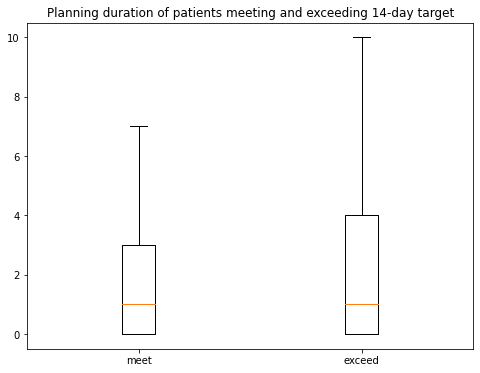

In [80]:
y_exceed = df_exceed['PlanDur'].to_numpy()
y_meet=df_meet['PlanDur']
y_exceed = y_exceed[y_exceed>=0]
y_meet=y_meet[y_meet>=0]
data = [y_meet, y_exceed]
plt.figure(figsize=(8,6))
plt.boxplot(data, showfliers=False)
plt.xticks([1,2],['meet','exceed'])
plt.title('Planning duration of patients meeting and exceeding 14-day target')


Text(0.5, 1.0, 'Contouring duration of patients meeting and exceeding 14-day target')

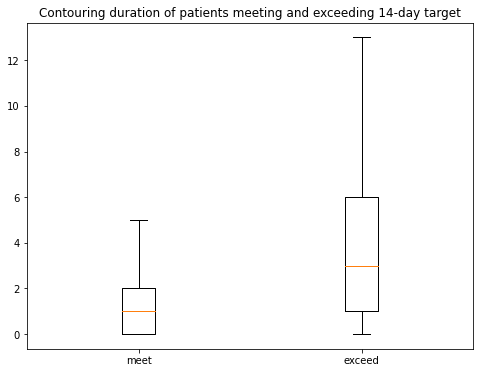

In [81]:
y_exceed = df_exceed['ContourDur'].to_numpy()
y_meet=df_meet['ContourDur']
y_exceed = y_exceed[y_exceed>=0]
y_meet=y_meet[y_meet>=0]
data = [y_meet, y_exceed]
plt.figure(figsize=(8,6))
plt.boxplot(data, showfliers=False)
plt.xticks([1,2],['meet','exceed'])
plt.title('Contouring duration of patients meeting and exceeding 14-day target')

In [ ]:
'''print(df_exceed['PlanDur'].mean())
df_plot = df_exceed[(df_exceed['PlanDur']<=30)&(df_exceed['PlanDur']>=0)]
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_plot['PlanDur']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of test case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()'''

all  -0.42495948136142625
exceed 0.2393992932862191


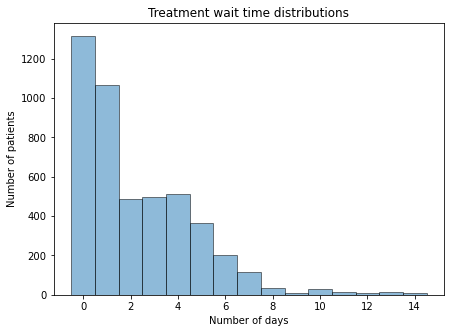

In [66]:
print('all ', df['Tx-PlanCompl'].mean())
print('exceed', df_exceed['Tx-PlanCompl'].mean())
df_plot = df[(df['Tx-PlanCompl']<=30)&(df['Tx-PlanCompl']>=0)]
df_plot2 = df_exceed[(df_exceed['Tx-PlanCompl']<=30)&(df_exceed['Tx-PlanCompl']>=0)]
plt.figure(figsize=[7,5])
bins = range(0,16)

y = df_plot['Tx-PlanCompl']
y2 = df_plot2['Tx-PlanCompl']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left',label='All')
#plt.hist(y2, bins = bins, alpha=0.5, edgecolor='black', align='left', label='Exceed')

plt.xlabel('Number of days')
plt.ylabel('Number of patients')
plt.title('Treatment wait time distributions')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [67]:
len(df[df['Tx-PlanCompl']>5])/len(df[df['Tx-PlanCompl']>=0])

0.09978813559322033

all  4.080638215408467
exceed  8.127562780541066


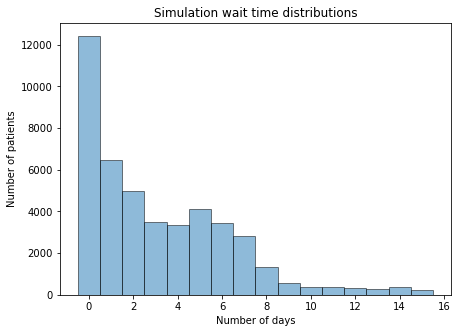

In [68]:
print('all ', df['CTWait'].mean())
print('exceed ', df_exceed['CTWait'].mean())
df_plot = df[(df['CTWait']<=30)&(df['CTWait']>=0)]
df_plot2 = df_exceed[(df_exceed['CTWait']<=30)&(df_exceed['CTWait']>=0)]
plt.figure(figsize=[7,5])
bins = range(0,17)

y = df_plot['CTWait']
y2 = df_plot2['CTWait']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left', label='All')
#plt.hist(y2, bins = bins, alpha=0.5, edgecolor='black', align='left', label='Exceed')

plt.xlabel('Number of days')
plt.ylabel('Number of patients')
plt.title('Simulation wait time distributions')
#plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
'''print(df_exceed['CTWait'].mean())
df_plot = df_exceed[(df_exceed['CTWait']<=30)&(df_exceed['CTWait']>=0)]
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_plot['CTWait']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of test case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()'''

all 4.483935629587804
exceed 5.545676567656765


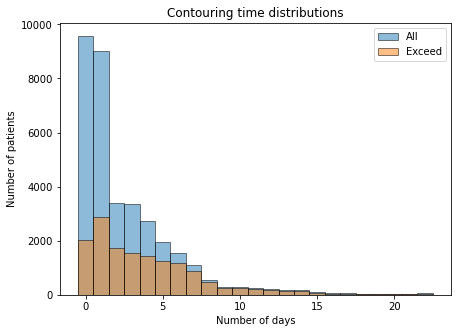

In [69]:
print('all', df['ContourDur'].mean())
print('exceed', df_exceed['ContourDur'].mean())
df_plot = df[(df['ContourDur']<=30)&(df['ContourDur']>=0)]
df_plot2 = df_exceed[(df_exceed['ContourDur']<=30)&(df_exceed['ContourDur']>=0)]
plt.figure(figsize=[7,5])
bins = range(0,24)

y = df_plot['ContourDur']
y2 = df_plot2['ContourDur']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left', label='All')
plt.hist(y2, bins = bins, alpha=0.5, edgecolor='black', align='left', label='Exceed')

plt.xlabel('Number of days')
plt.ylabel('Number of patients')
plt.title('Contouring time distributions')
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
'''print(df_exceed['ContourDur'].mean())
df_plot = df_exceed[(df_exceed['ContourDur']<=30)&(df_exceed['ContourDur']>=0)]
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_plot['ContourDur']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('Contour time distribution of >14')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()'''

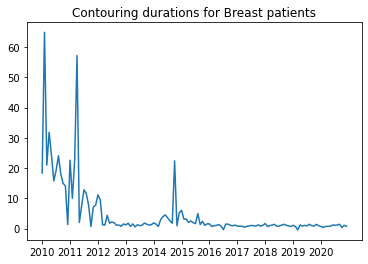

In [125]:
# breast, 
breast_contour = {}
years_month_list =[]
df_breast = df[df['SiteGroup']=='BREAST']
for y in range(2010, 2021):
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.plot(x,y)
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title("Contouring durations for Breast patients");


In [126]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

# What percentage of Contour/Plan take in the whole pre-treatment process

In [ ]:
df['']

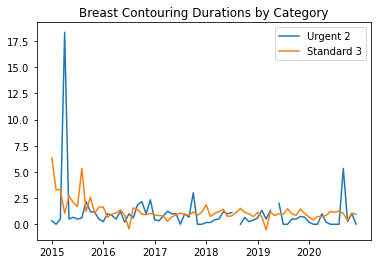

In [129]:
breast_contour = {}
y1=[]
y2=[]
y3=[]
df_breast = df[df['SiteGroup']=='BREAST']
for y in range(2015, 2021):
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        df1=df_y[df_y['Category_x']=='Emergency 1']
        df2=df_y[(df_y['Category_x']=='Urgent 2')|(df_y['Category_x']=='Urgent ICU/SDU 2')]
        df3=df_y[(df_y['Category_x']=='Standard 3')|(df_y['Category_x']=='Standard 2')]
        
        avg1 = df1[df1['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y1.append(avg1)
        avg2 = df2[df2['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y2.append(avg2)
        avg3 = df3[df3['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y3.append(avg3)
    

x = range(1,73)
#plt.plot(x, y1, label='Emergency 1')
plt.plot(x, y2, label='Urgent 2')
plt.plot(x, y3, label='Standard 3')
plt.legend()
plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
plt.title("Breast Contouring Durations by Category");


In [130]:
df['Intent1'].unique()

array(['Palliative', 'Radical', 'Complex Palliation',
       'PalliatiComplex Palliationve', nan], dtype=object)

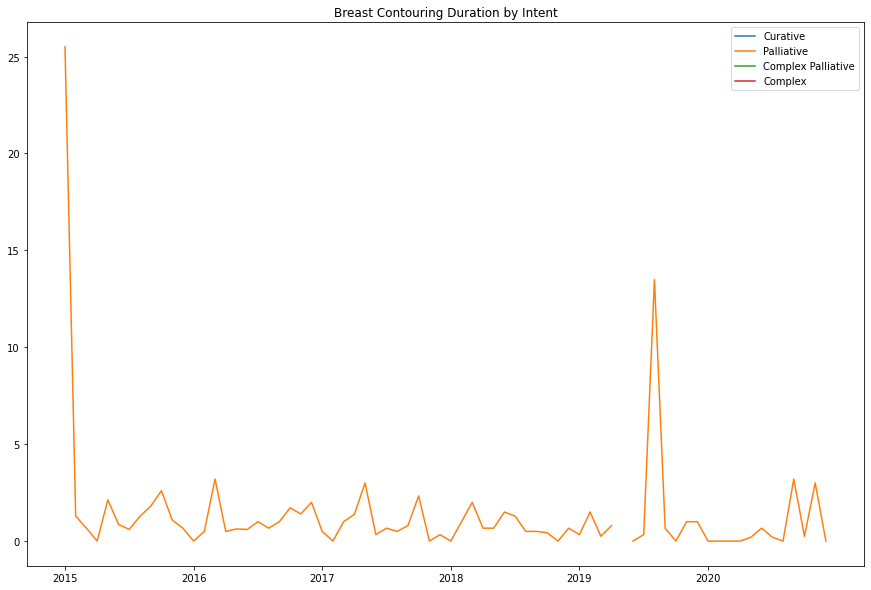

In [133]:
breast_contour = {}
y1=[]
y2=[]
y3=[]
y4=[]
df_breast = df[df['SiteGroup']=='BREAST']
for y in range(2015, 2021):
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        
        df1=df_y[df_y['Intent1']=='Curative']
        df2=df_y[df_y['Intent1']=='Palliative']
        df3=df_y[df_y['Intent1']=='Complex Palliative']
        df4=df_y[df_y['Intent1']=='PalliatiComplex Palliationve']
        
        avg1 = df1[df1['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y1.append(avg1)
        avg2 = df2[df2['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y2.append(avg2)
        avg3 = df3[df3['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y3.append(avg3)
        avg4 = df4[df4['CreatedDate'].dt.month == m]['ContourDur'].mean()
        y4.append(avg4)
    

x = range(1,73)
plt.figure(figsize=(15,10))
plt.plot(x, y1, label='Curative')
plt.plot(x, y2, label='Palliative')
plt.plot(x, y3, label='Complex Palliative')
plt.plot(x, y4, label='Complex')
plt.legend()
plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
plt.title("Breast Contouring Duration by Intent");

In [135]:
df_y = df_breast[df_breast['CreatedDate'].dt.year == 2015]
df1=df_y[df_y['Category_x']=='Emergency 1']
df1[df1['CreatedDate'].dt.month == 1]['ContourDur']

18088   NaN
41311   NaN
Name: ContourDur, dtype: float64

In [136]:
df_y = df_breast[df_breast['CreatedDate'].dt.year == 2019]
df_y['Intent'].unique()

array(['Adjuvant', 'Palliative', 'Deferred RT-Curative',
       'Complex Palliative', 'Radical', 'Curative', 'Neoadjuvant'],
      dtype=object)

In [137]:
from statistics import mode
mode(y1)

nan

Text(0.5, 1.0, 'Monthly number of Contouring time for H&N patients')

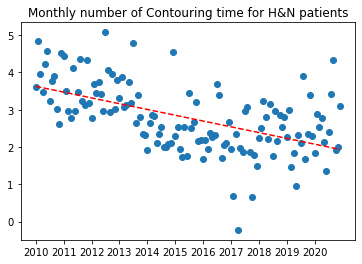

In [139]:
# H and N 
breast_contour = {}
years_month_list =[]
df_breast = df[df['SiteGroup']=='ENT (HEAD & NECK)']
for y in range(2010, 2021):
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title('Monthly number of Contouring time for H&N patients')


Text(0.5, 1.0, 'Monthly number of Contouring time for LUNG patients')

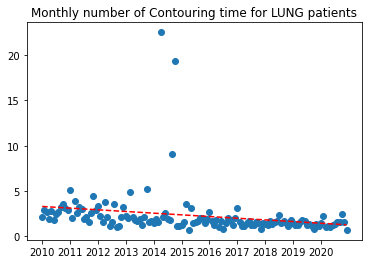

In [146]:
breast_contour = {}
years_month_list =[]
df_breast = df[df['SiteGroup']=='LUNG']
for y in range(2010, 2021):
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title('Monthly number of Contouring time for LUNG patients')


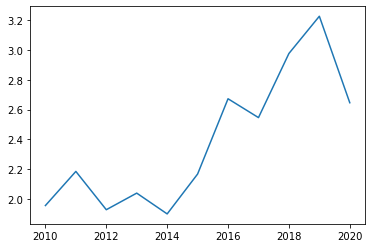

In [140]:
year_CTReviewWait = []
df_site = df[df['SiteGroup']=='BREAST']
for y in range(2010,2021):
    df_y = df_site[df_site['CreatedDate'].dt.year == y]
    year_CTReviewWait.append(df_y[df_y['CTReviewWait']>=0]['CTReviewWait'].mean())
x= range(2010,2021)    
y = year_CTReviewWait
plt.plot(x,y)


In [141]:
df_y = df[df['CreatedDate'].dt.year == 2019]
df_y[df_y['CTReviewWait']>=0]['CTReviewWait'].mean()


2.157086223984143

# Arrivals

## General number of arrivals

In [147]:
def plotMonthly(year, count):
    
    plt.figure(figsize=(10,5))
    plt.plot(count, '-o', label='CTs')

    plt.legend(loc="upper right")
    plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
    plt.title("%i monthly count of new patient arrivals" %year)

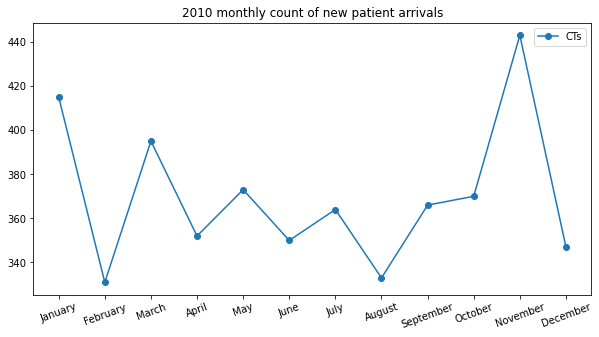

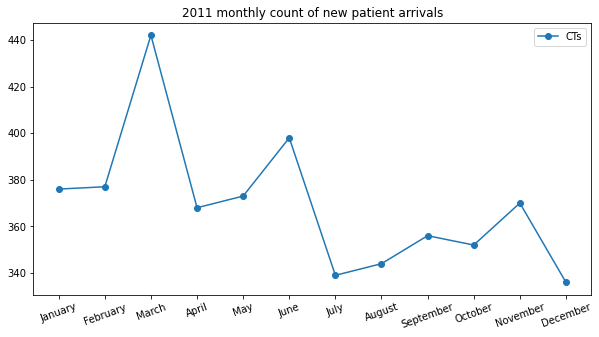

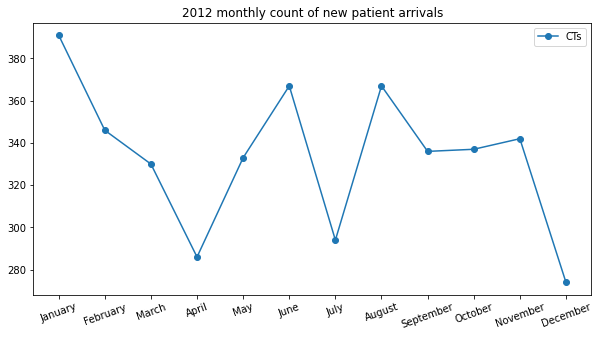

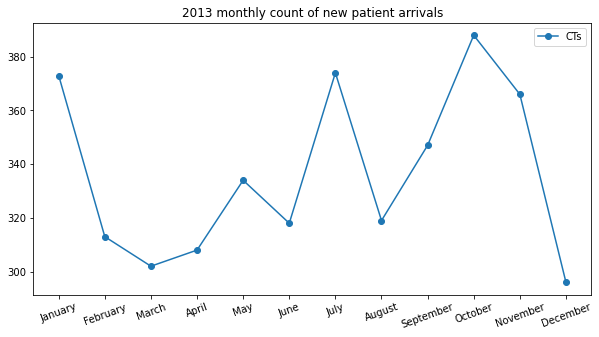

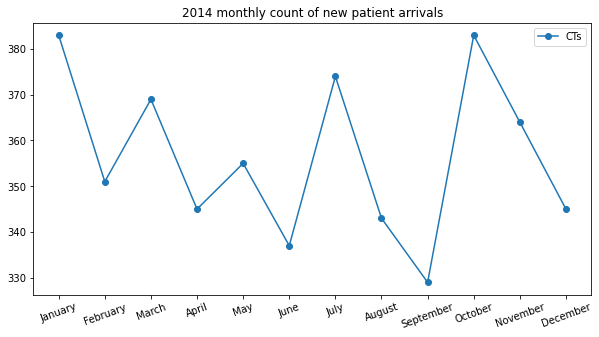

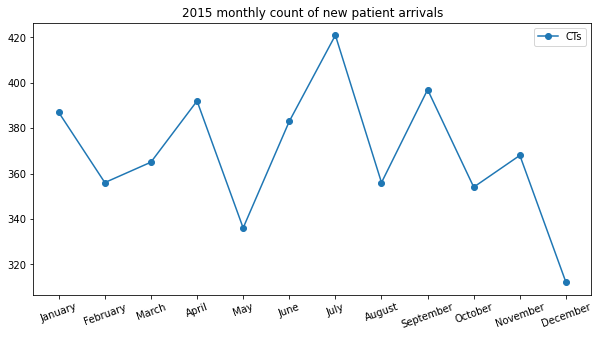

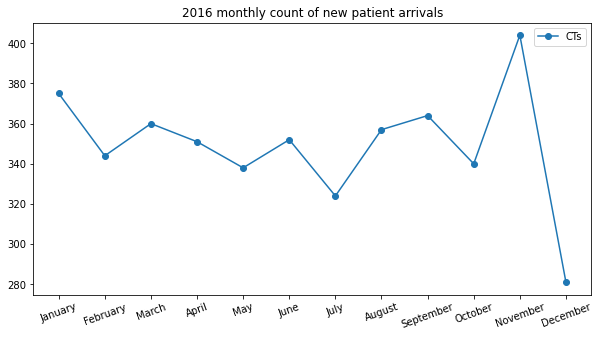

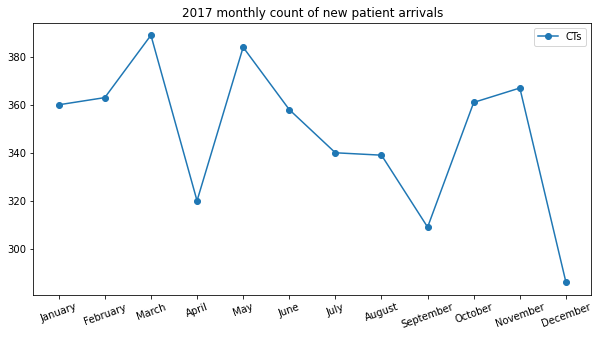

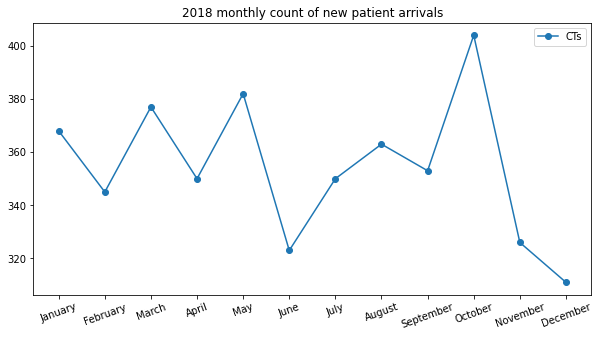

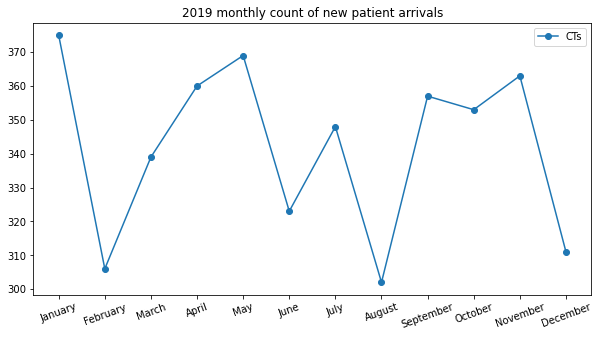

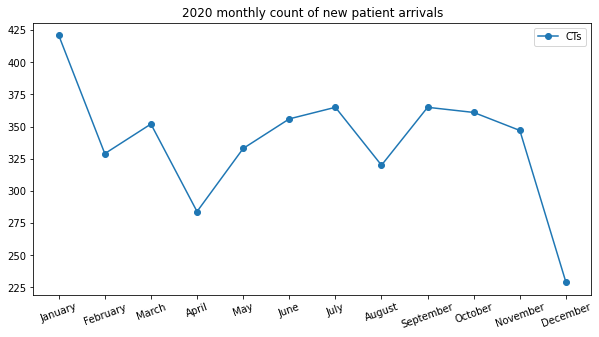

In [148]:
arrival={}
for y in range(2010,2021):
    df_year = df[df['CreatedDate'].dt.year == y]
    monthly_count=[]
    for m in range(1,13):
        df_month=df_year[df_year['CreatedDate'].dt.month==m]
        grouped=df_month.groupby(['MRN', 'CreatedDate']).nunique()
        monthly_count.append(len(grouped))
        arrival[y] = monthly_count # dictionary: {year: [list of monthly arrivals]}

for i in range(2010, 2021):
    year=i
    plotMonthly(year, arrival[year])

Text(0.5, 1.0, 'Monthly number of [non planned delayed] patients over the years')

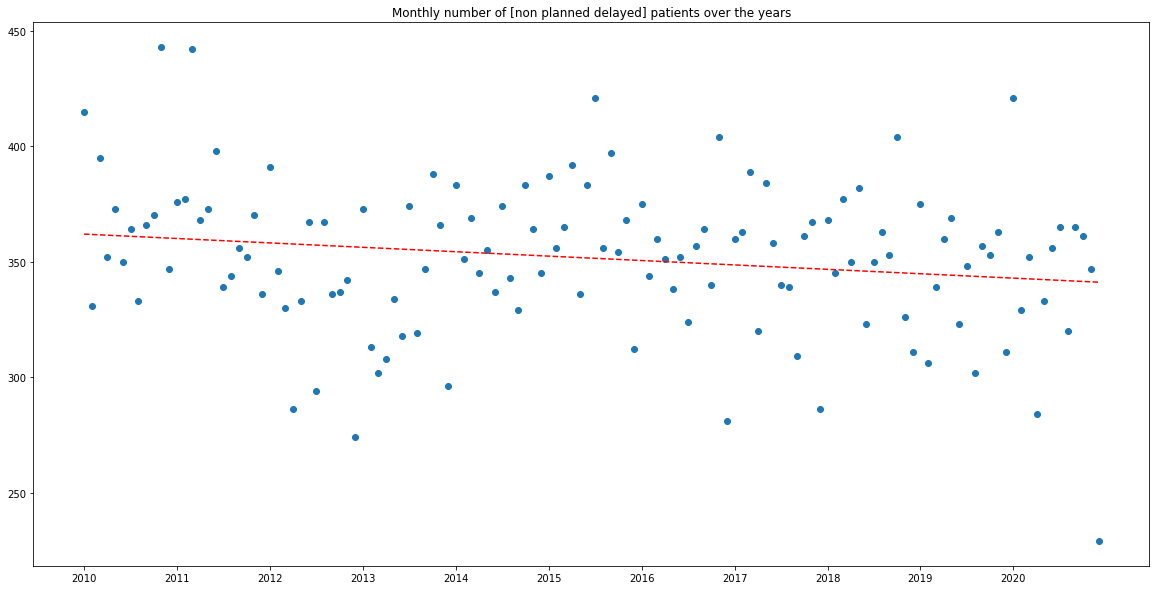

In [149]:
all_arrival = []
for i in range(2010,2021):
    all_arrival += arrival[i]

x=range(1,133)
y=all_arrival
plt.figure(figsize=(20,10))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title('Monthly number of [non planned delayed] patients over the years')

In [150]:
# count total arrivals by months
df_count_all = df.groupby([df['CreatedDate'].dt.year.rename('Year'), 
                       df['CreatedDate'].dt.month.rename('Month')]).count().reset_index()
df_count_all = df_count_all[['Year','Month','MRN']]

df_count_all.head()

,Year,Month,MRN
0,2009,9,1
1,2009,10,1
2,2009,11,5
3,2009,12,32
4,2010,1,415


In [92]:
# create excel writer
writer = pd.ExcelWriter('NumArrival.xlsx')
# write dataframe to excel sheet named 'marks'
df_count_all.to_excel(writer, 'all')
# save the excel file
writer.save()
print('DataFrame is written successfully to Excel Sheet.')

DataFrame is written successfully to Excel Sheet.


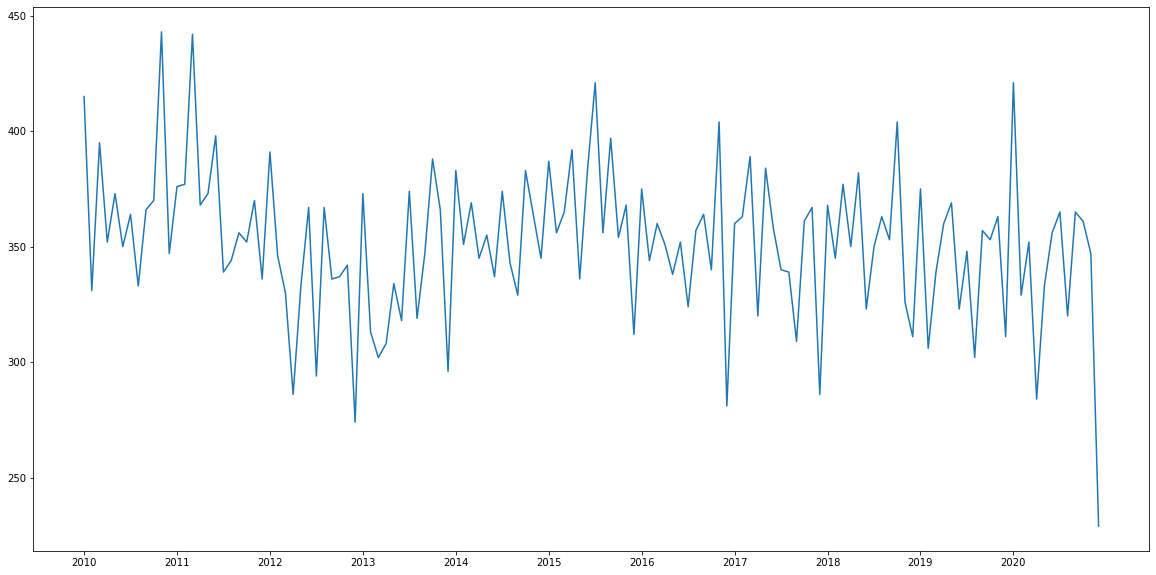

In [151]:
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021));


In [152]:
df_2020 = df[df['CreatedDate'].dt.year == 2020]
df_2020_arr = df_2020.groupby(['CreatedDate']).count().reset_index()

In [153]:
arr_2020_Nov = df_2020_arr[df_2020_arr['CreatedDate'].dt.month == 11][['CreatedDate','MRN']]
arr_2020_Nov[(arr_2020_Nov['CreatedDate'].dt.weekday != 5)&(arr_2020_Nov['CreatedDate'].dt.weekday != 6)]['MRN'].mean()

16.38095238095238

In [154]:
arr_2020_Jan = df_2020_arr[df_2020_arr['CreatedDate'].dt.month == 1][['CreatedDate','MRN']]
arr_2020_Jan[(arr_2020_Jan['CreatedDate'].dt.weekday != 5)&(arr_2020_Jan['CreatedDate'].dt.weekday != 6)]['MRN'].mean()

18.304347826086957

In [155]:
df['Sitegroup_y'].head()

0                    LUNG
1                    LUNG
2       GENITOURINARY(GU)
3                    LUNG
4    GASTROINTESTINAL(GI)
Name: Sitegroup_y, dtype: object

In [156]:
df_count = df.groupby([df['TxStartDt'].dt.year.rename('Year'), 
                       df['TxStartDt'].dt.month.rename('Month'),
                       df['Category_x'].rename('Category'),
                       df['Sitegroup_y'].rename('Sitegroup')
                      ]).count().reset_index()
df_count = df_count[['Year','Month','Category','Sitegroup','MRN']]
df_count

,Year,Month,Category,Sitegroup,MRN
0,2010,1,Emergency 1,BREAST,1
1,2010,1,Emergency 1,CNS,1
2,2010,1,Emergency 1,ENDOCRINE,1
3,2010,1,Emergency 1,EYE,1
4,2010,1,Emergency 1,GASTROINTESTINAL(GI),4
...,...,...,...,...,...
4568,2020,12,Urgent 2,LUNG,29
4569,2020,12,Urgent 2,LYMPHOMA,4
4570,2020,12,Urgent 2,SARCOMA,4
4571,2020,12,Urgent 2,SKIN,1


In [17]:
#df_count.to_excel("PatientArrivals.xlsx")

# create excel writer
writer = pd.ExcelWriter('NumArrival.xlsx')
# write dataframe to excel sheet named 'marks'
df_count_all.to_excel(writer, "all")
df_count.to_excel(writer, 'bySiteGroup')
# save the excel file
writer.save()
print('DataFrame is written successfully to Excel Sheet.')

DataFrame is written successfully to Excel Sheet.


## Arrivals of urgent patients

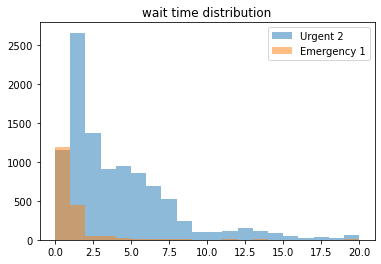

In [158]:
y1 = df[df['Category_x']=='Emergency 1']['WaitTime']
y2 = df[df['Category_x']=='Urgent 2']['WaitTime']
bins = range(0,21)
plt.hist(y2, bins=bins, alpha=0.5, label = 'Urgent 2')
plt.hist(y1, bins=bins, alpha=0.5, label = 'Emergency 1')
plt.title('wait time distribution')
plt.legend()


In [159]:
def plotUrgentMonthlyArrival(year, urgent_arrival):
    
    plt.figure(figsize=(10,5))
    plt.plot(urgent_arrival, '-o', label='emergency')
    #plt.plot(Tx_count, '-s', label='linacs')

    plt.legend(loc="upper right")
    plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
    plt.title("%i monthly count of emergency patients" %year)

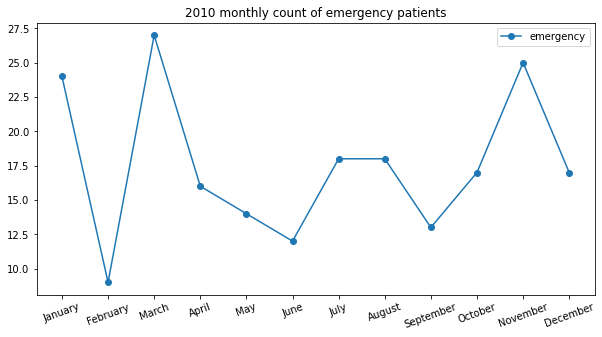

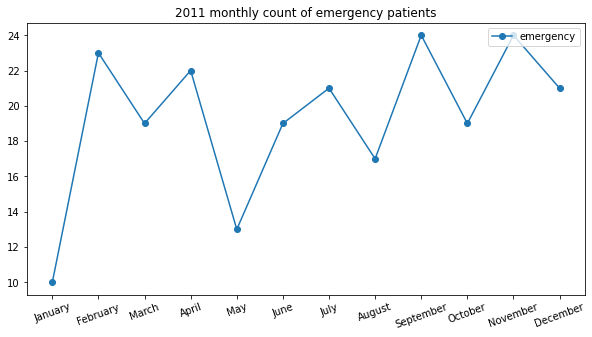

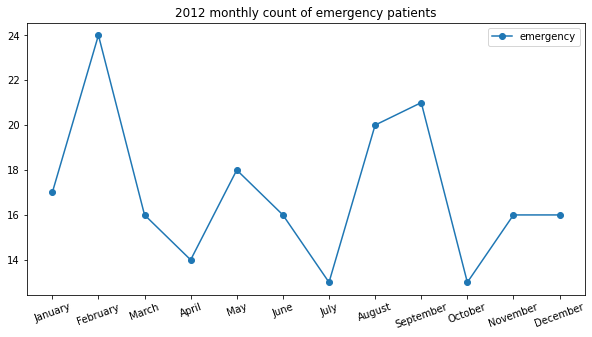

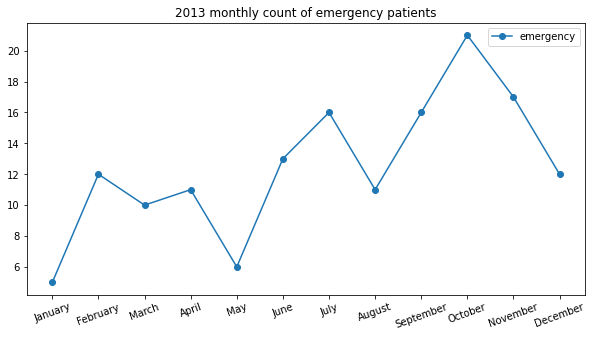

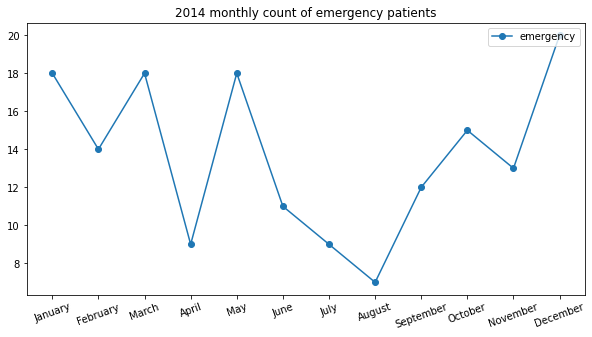

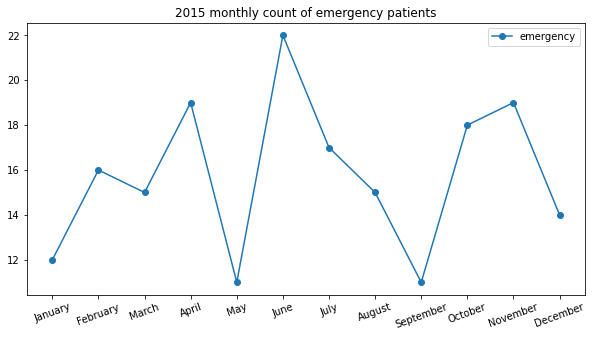

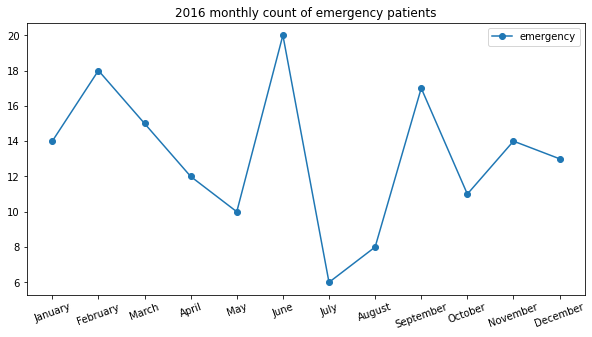

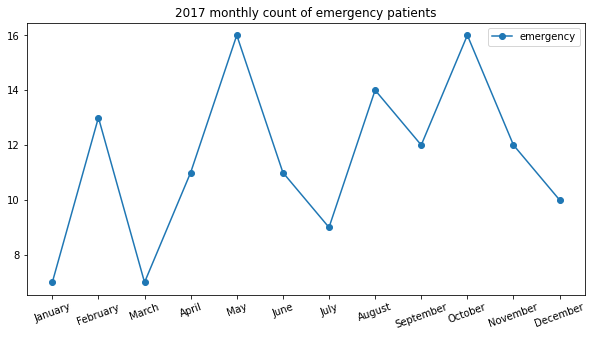

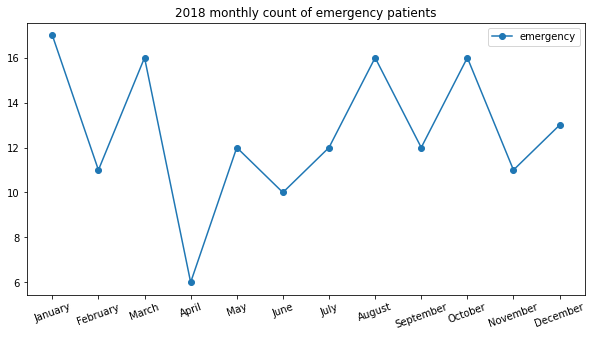

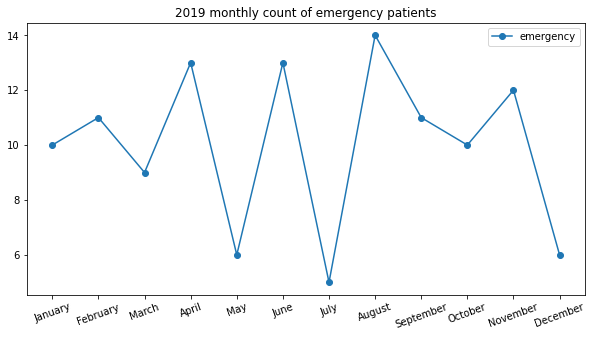

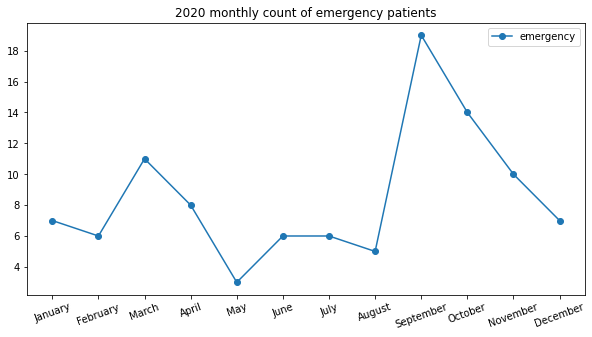

In [160]:
urgent_arrival={}
for y in range(2010,2021):
    df_year = df[df['CreatedDate'].dt.year == y]
    monthly_count=[]
    for m in range(1,13):
        df_month=df_year[df_year['CreatedDate'].dt.month==m]
        df_month=df_month[(df_month['Category_x'] == 'Emergency 1')]
        grouped=df_month.groupby(['MRN', 'CreatedDate']).nunique()
        monthly_count.append(len(grouped))
        urgent_arrival[y] = monthly_count # dictionary: {year: [list of monthly arrivals]}
        
for i in range(2010, 2021):
    year=i
    plotUrgentMonthlyArrival(year, urgent_arrival[year])


Text(0.5, 1.0, 'Monthly number of Emergency 1 patients over the years')

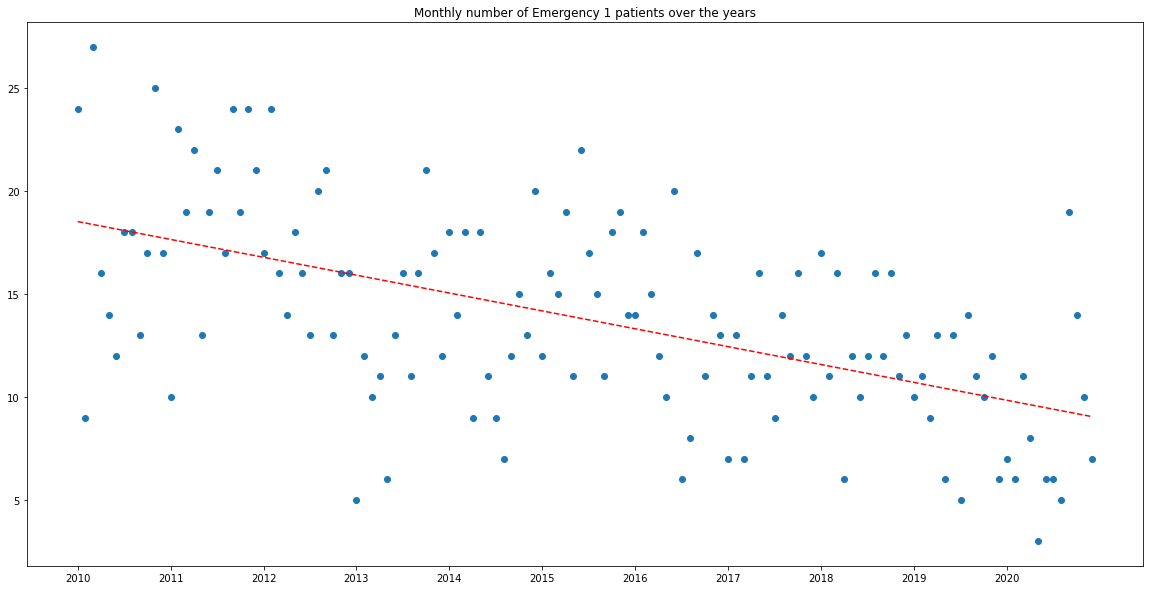

In [162]:
all_monthly_urgent = []
for i in range(2010,2021):
    all_monthly_urgent += urgent_arrival[i]

x=range(1,133)
y=all_monthly_urgent
plt.figure(figsize=(20,10))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title('Monthly number of Emergency 1 patients over the years')


In [163]:
# percentage of urgent patients each month
emerg_proportion = {} # dictionary of monthly urgent patients percentage in each year: (year: [list of monthly urgent])
for y in range(2010,2021):
    df_year = df[df['CreatedDate'].dt.year == y]
    monthly_urgent = []
    for m in range(1, 13):
        df_month = df_year[df_year['CreatedDate'].dt.month==m]
        num_urgent = df_month[(df_month['Category_x'] == 'Emergency 1')]
        monthly_urgent.append(len(num_urgent)/len(df_month))
    emerg_proportion[y] = monthly_urgent


In [164]:
emerg_proportion

{2010: [0.05783132530120482,
  0.027190332326283987,
  0.06835443037974684,
  0.045454545454545456,
  0.03753351206434316,
  0.03428571428571429,
  0.04945054945054945,
  0.05405405405405406,
  0.03551912568306011,
  0.04594594594594595,
  0.056433408577878104,
  0.04899135446685879],
 2011: [0.026595744680851064,
  0.0610079575596817,
  0.042986425339366516,
  0.059782608695652176,
  0.03485254691689008,
  0.04773869346733668,
  0.061946902654867256,
  0.04941860465116279,
  0.06741573033707865,
  0.05397727272727273,
  0.06486486486486487,
  0.0625],
 2012: [0.043478260869565216,
  0.06936416184971098,
  0.048484848484848485,
  0.04895104895104895,
  0.05405405405405406,
  0.043596730245231606,
  0.04421768707482993,
  0.05449591280653951,
  0.0625,
  0.03857566765578635,
  0.04678362573099415,
  0.058394160583941604],
 2013: [0.013404825737265416,
  0.038338658146964855,
  0.033112582781456956,
  0.03571428571428571,
  0.017964071856287425,
  0.040880503144654086,
  0.04278074866310

Text(0.5, 1.0, 'Monthly percentage of urgent patients over the years')

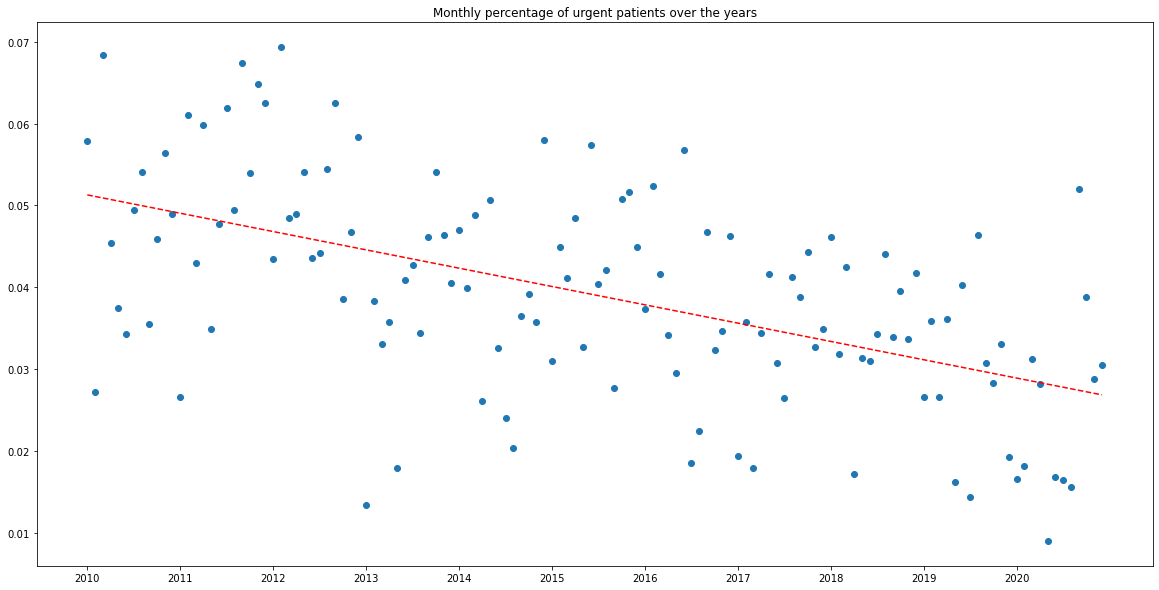

In [165]:
monthly_emergency_percentage = []
for i in range(2010,2021):
    monthly_emergency_percentage += emerg_proportion[i]

x=range(1,133)
y=monthly_emergency_percentage
plt.figure(figsize=(20,10))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title('Monthly percentage of urgent patients over the years')

## Arrivals of Standard 3 and Urgent 2 patients

In [166]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

In [167]:
df_ctg = df.replace({'Category_x': {'Standard 2': 'Standard 3', 
                                    'Urgent ICU/SDU 2':'Urgent 2'}})
df_ctg['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', nan], dtype=object)

In [168]:
df_count_std = df_ctg.groupby([df_ctg['CreatedDate'].dt.year.rename('Year'), 
                       df_ctg['CreatedDate'].dt.month.rename('Month'),
                       df_ctg['Category_x'].rename('Category')]).count().reset_index()
df_count_std = df_count_std[df_count_std['Category']=='Standard 3'][['Year','Month','Category','MRN']]
df_count_std

,Year,Month,Category,MRN
0,2009,9,Standard 3,1
1,2009,10,Standard 3,1
2,2009,11,Standard 3,5
3,2009,12,Standard 3,31
6,2010,1,Standard 3,308
...,...,...,...,...
387,2020,8,Standard 3,246
390,2020,9,Standard 3,263
393,2020,10,Standard 3,279
396,2020,11,Standard 3,252


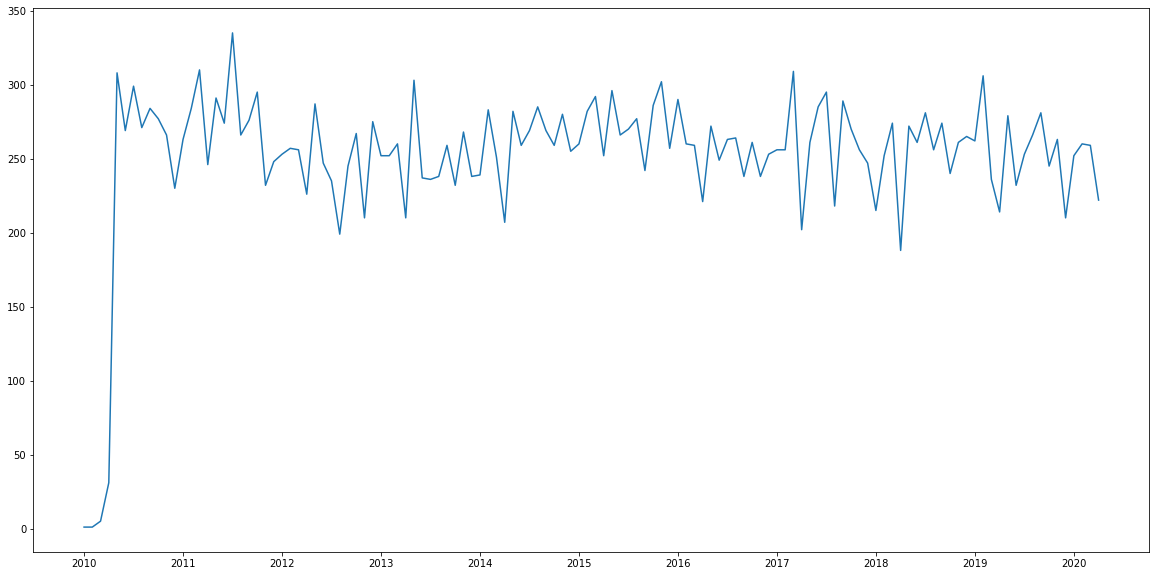

In [172]:
df_count_std=df_count_std[df_count_std['Year']<=2020]
x=range(1,125)
y=df_count_std['MRN']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.xticks(np.arange(1, 125, step=12), labels=range(2010,2021));


## Arrivals by SiteGroups

In [7]:
df.head()

,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,TimeBtw_ContourCompl_PlanReview,TimeBtw_BkTx_PlanReview,TimeBtw_Sim_PlanReview,TxBook-Sim,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait,Unnamed: 86
0,1266,2012-07-16,1999-11-30 15:17:48,2012-07-16,1999-11-30 15:21:33,Lung,mets brain - ca lung,Urgent 2,2012-07-16,1999-11-30 15:20:47,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
1,2918,2015-12-24,1999-11-30 11:49:31,2015-12-24,1999-11-30 11:50:54,Lung,ca lung NSCLC-right,Urgent 2,2015-12-24,1999-11-30 11:50:31,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2990,2014-11-18,1999-11-30 15:07:24,2014-11-18,1999-11-30 15:13:27,GU,Ca Prostate,Standard 3,2014-11-18,1999-11-30 15:08:55,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,5723,2013-07-11,1999-11-30 17:02:55,2013-07-11,1999-11-30 17:05:16,Lung,ca lung NSCLC-left,Standard 3,2013-07-11,1999-11-30 17:04:08,...,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
4,6291,2015-04-15,1999-11-30 18:00:44,2015-04-15,1999-11-30 18:18:52,GI Lower,Ca Anal Canal,Standard 3,2015-04-15,1999-11-30 18:14:57,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [18]:
df_count_sitegroup = df.groupby([df['CreatedDate'].dt.year.rename('Year'), 
                       df['CreatedDate'].dt.month.rename('Month'),
                       df['Sitegroup_y'].rename('Sitegroup')]).count().reset_index()
df_count_sitegroup = df_count_sitegroup[['Year','Month','Sitegroup','MRN']]
df_count_sitegroup = df_count_sitegroup[df_count_sitegroup['Year']<2020]

In [26]:
df_count_sitegroup.Sitegroup.unique()

array(['BREAST', 'CNS', 'ENDOCRINE', 'ENT (HEAD & NECK)', 'EYE',
       'GASTROINTESTINAL(GI)', 'GENITOURINARY(GU)', 'GYNAE', 'LEUKEMIA',
       'LUNG', 'LYMPHOMA', 'PAEDIATRIC', 'SARCOMA', 'SKIN', 'UNKNOWN',
       'Non Cancer Dx', 'OTHER SITES C76', 'Hodgkin Dis.',
       'NON CANCER DX'], dtype=object)

In [41]:
df_count_sitegroup['dateInt']= df_count_sitegroup['Year'].astype(str) + df_count_sitegroup['Month'].astype(str).str.zfill(2)
df_count_sitegroup['YearMonth'] = pd.to_datetime(df_count_sitegroup['dateInt'], format='%Y%m')

df_count_sitegroup.set_index('YearMonth', inplace=True)
df_breast = df_count_sitegroup[df_count_sitegroup['Sitegroup']=='BREAST']


In [42]:
#df_breast.reset_index(inplace=True)

In [43]:
df_breast=df_breast[['Sitegroup','MRN']]
df_breast.head()

,Sitegroup,MRN
YearMonth,,
2010-01-01,BREAST,100
2010-02-01,BREAST,68
2010-03-01,BREAST,82
2010-04-01,BREAST,72
2010-05-01,BREAST,95


In [51]:
df_breast.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=120, freq=None)

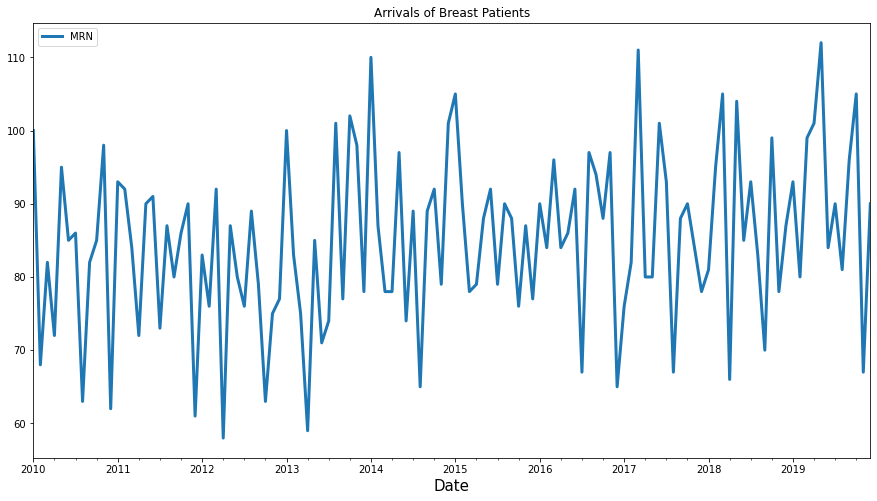

In [25]:
df_breast[['MRN']].plot(figsize=(15,8), linewidth=3, fontsize=10)
plt.xlabel('Date', fontsize=15)
plt.title('Arrivals of Breast Patients');

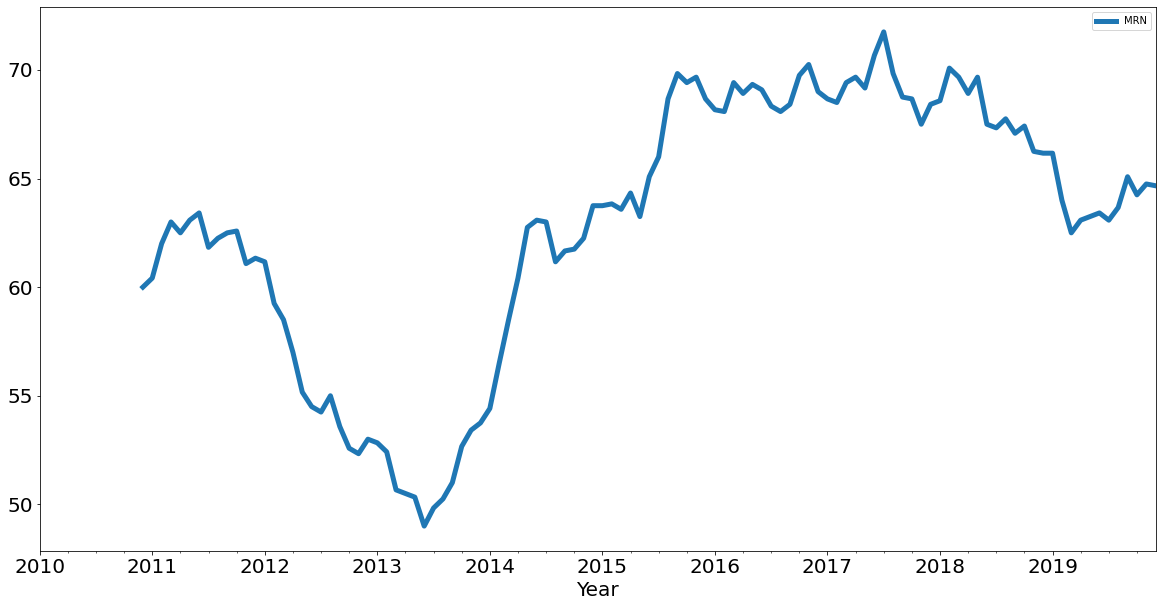

In [141]:
breast = df_breast[['MRN']]
breast.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
# yearly seasonality - breast patients

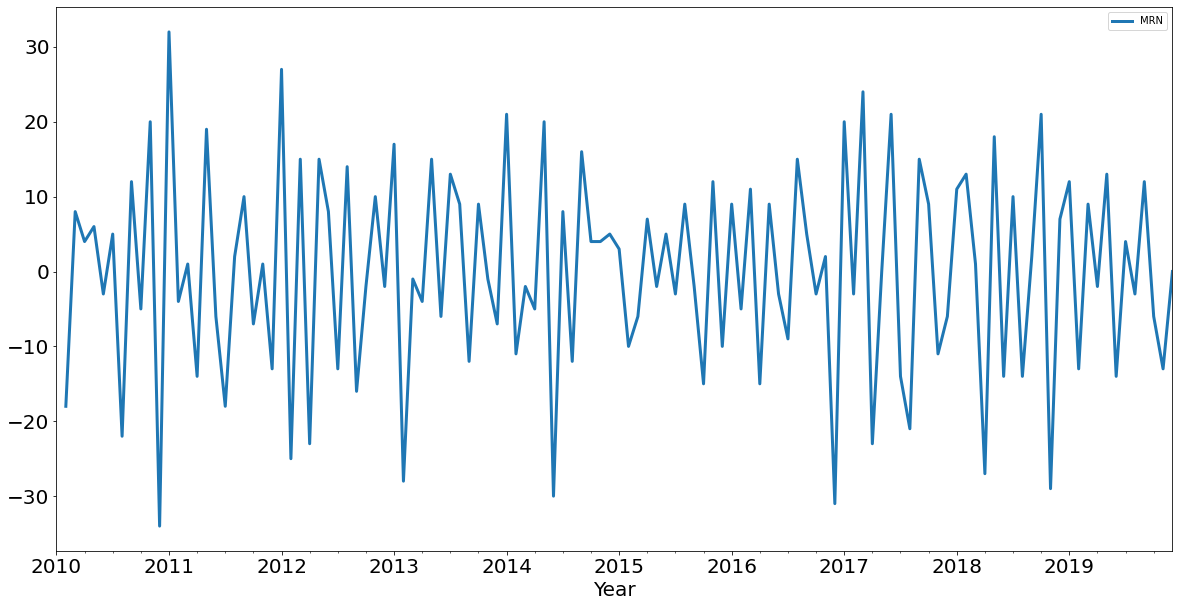

In [120]:
breast.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

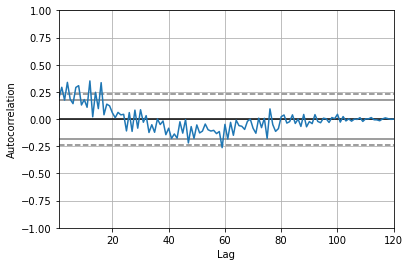

In [142]:
pd.plotting.autocorrelation_plot(breast);

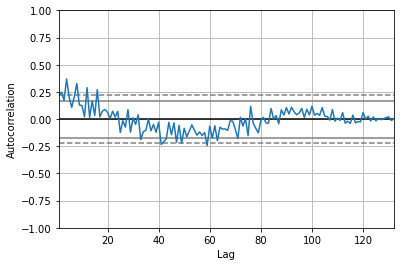

In [92]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(breast)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                    MRN   No. Observations:                  120
Model:                ARIMA(12, 0, 1)   Log Likelihood                -430.514
Date:                Fri, 07 May 2021   AIC                            891.028
Time:                        15:05:59   BIC                            932.841
Sample:                    01-01-2010   HQIC                           908.008
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.8066      3.201     19.619      0.000      56.532      69.081
ar.L1         -0.6691      0.137     -4.902      0.000      -0.937      -0.402
ar.L2          0.2442      0.136      1.790      0.0

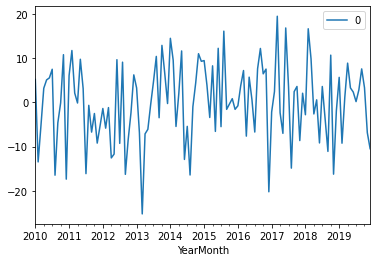

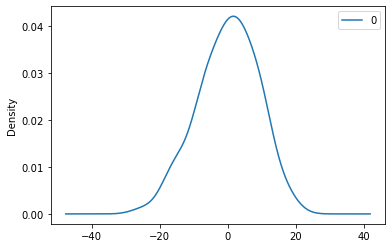

                0
count  120.000000
mean     0.033017
std      8.773023
min    -25.230221
25%     -5.891739
50%      0.385642
75%      6.293165
max     19.501252


In [143]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(breast, order=(12,0,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())


predicted=65.472341, expected=74.000000
predicted=66.370950, expected=79.000000
predicted=70.355221, expected=76.000000
predicted=71.114000, expected=78.000000
predicted=70.131158, expected=47.000000
predicted=66.907252, expected=67.000000
predicted=57.395061, expected=64.000000
predicted=71.734240, expected=88.000000
predicted=67.743630, expected=65.000000
predicted=75.529676, expected=65.000000
predicted=62.780797, expected=86.000000
predicted=68.480543, expected=72.000000
predicted=69.344666, expected=51.000000
predicted=61.692133, expected=66.000000
predicted=71.796048, expected=75.000000
predicted=73.105602, expected=64.000000
predicted=56.126818, expected=58.000000
predicted=74.609194, expected=69.000000
predicted=61.953684, expected=82.000000
predicted=71.290959, expected=83.000000
predicted=60.028585, expected=56.000000
predicted=71.900378, expected=74.000000
predicted=70.439933, expected=60.000000
predicted=67.048889, expected=70.000000
predicted=59.586906, expected=56.000000


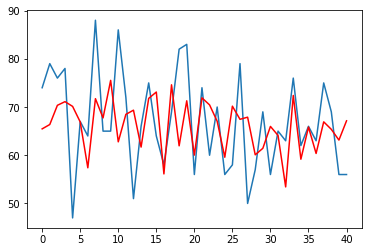

In [144]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = breast.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [145]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [125]:
# evaluate parameters
p_values = [8, 10, 12]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(breast.values, p_values, d_values, q_values)

ARIMA(8, 0, 0) MSE=111.202
ARIMA(8, 0, 1) MSE=97.469
ARIMA(8, 0, 2) MSE=118.276
ARIMA(8, 1, 0) MSE=113.012
ARIMA(8, 1, 1) MSE=102.367
ARIMA(8, 1, 2) MSE=97.938
ARIMA(8, 2, 0) MSE=147.296
ARIMA(8, 2, 1) MSE=115.364
ARIMA(8, 2, 2) MSE=103.160
ARIMA(10, 0, 0) MSE=113.824
ARIMA(10, 0, 1) MSE=101.219
ARIMA(10, 0, 2) MSE=106.281
ARIMA(10, 1, 0) MSE=116.390
ARIMA(10, 1, 1) MSE=114.744
ARIMA(10, 1, 2) MSE=102.037
ARIMA(10, 2, 0) MSE=142.628
ARIMA(10, 2, 1) MSE=118.870
ARIMA(10, 2, 2) MSE=103.497
ARIMA(12, 0, 0) MSE=109.670
ARIMA(12, 0, 1) MSE=100.974
ARIMA(12, 0, 2) MSE=101.058
ARIMA(12, 1, 0) MSE=112.458
ARIMA(12, 1, 1) MSE=101.404
ARIMA(12, 1, 2) MSE=101.855
ARIMA(12, 2, 0) MSE=137.803
ARIMA(12, 2, 1) MSE=115.248
ARIMA(12, 2, 2) MSE=103.416
Best ARIMA(8, 0, 1) MSE=97.469


In [ ]:


## Arrivals of planned delays should be considered in the machines available hours

In [130]:
df_count_breast = df_count[df_count['SiteGroup']=='Breast']
df_count_breast

,Year,Month,Category,SiteGroup,MRN
0,2010,1,Emergency 1,Breast,2
8,2010,1,Standard 3,Breast,60
19,2010,1,Urgent 2,Breast,6
36,2010,2,Standard 3,Breast,46
47,2010,2,Urgent 2,Breast,4
...,...,...,...,...,...
4064,2020,11,Emergency 1,Breast,1
4074,2020,11,Standard 3,Breast,37
4085,2020,11,Urgent 2,Breast,12
4101,2020,12,Standard 3,Breast,17


In [134]:
df_breast_1 = df_count_breast[df_count_breast['Category']=='Emergency 1']
df_breast_1

,Year,Month,Category,SiteGroup,MRN
0,2010,1,Emergency 1,Breast,2
57,2010,3,Emergency 1,Breast,3
87,2010,4,Emergency 1,Breast,1
116,2010,5,Emergency 1,Breast,2
145,2010,6,Emergency 1,Breast,2
...,...,...,...,...,...
3702,2019,11,Emergency 1,Breast,1
3820,2020,3,Emergency 1,Breast,1
3941,2020,7,Emergency 1,Breast,2
4032,2020,10,Emergency 1,Breast,3


In [165]:
df_b1 = df_breast.merge(df_breast_1, on=['Year','Month'], how='left')
values = {'Category': 'Emergency 1', 'MRN_y': 0}
df_b1.fillna(value=values, inplace=True)

In [166]:
df_b1

,Year,Month,SiteGroup_x,MRN_x,dateInt,Category,SiteGroup_y,MRN_y
0,2010,1,Breast,68,201001,Emergency 1,Breast,2.0
1,2010,2,Breast,50,201002,Emergency 1,NaN,0.0
2,2010,3,Breast,58,201003,Emergency 1,Breast,3.0
3,2010,4,Breast,62,201004,Emergency 1,Breast,1.0
4,2010,5,Breast,68,201005,Emergency 1,Breast,2.0
...,...,...,...,...,...,...,...,...
115,2019,8,Breast,63,201908,Emergency 1,Breast,1.0
116,2019,9,Breast,75,201909,Emergency 1,NaN,0.0
117,2019,10,Breast,69,201910,Emergency 1,NaN,0.0
118,2019,11,Breast,56,201911,Emergency 1,Breast,1.0


In [167]:

df_b1['Emergency'] = df_b1['MRN_y']/df_b1['MRN_x']

In [172]:
df_b1[df_b1['Year']==2019]

,Year,Month,SiteGroup_x,MRN_x,dateInt,Category,SiteGroup_y,MRN_y,Emergency
108,2019,1,Breast,69,201901,Emergency 1,NaN,0.0,0.000000
109,2019,2,Breast,56,201902,Emergency 1,Breast,1.0,0.017857
110,2019,3,Breast,65,201903,Emergency 1,NaN,0.0,0.000000
111,2019,4,Breast,63,201904,Emergency 1,Breast,1.0,0.015873
112,2019,5,Breast,76,201905,Emergency 1,Breast,2.0,0.026316
113,2019,6,Breast,62,201906,Emergency 1,Breast,1.0,0.016129
114,2019,7,Breast,66,201907,Emergency 1,NaN,0.0,0.000000
115,2019,8,Breast,63,201908,Emergency 1,Breast,1.0,0.015873
116,2019,9,Breast,75,201909,Emergency 1,NaN,0.0,0.000000
117,2019,10,Breast,69,201910,Emergency 1,NaN,0.0,0.000000


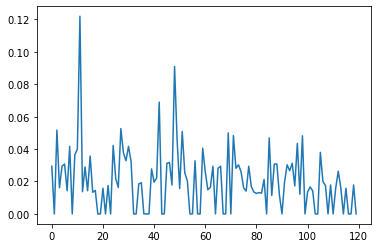

In [169]:
plt.plot(df_b1['Emergency'])